## Definition of Dicke-Generalized States

In [177]:
import numpy as np
from numpy import sqrt

#Number of atoms

N=7

#Parameters

chiR=1
chiL=1


OmegaR=7
OmegaL=6

#--------------------------------------

State_List=[]

import scipy.special

#Number of generalized Dicke states

N_Dicke=int(scipy.special.binom(N+3, 3))

#Sparse matrix asscoiated with the hamiltonian in the generalized Dicke basis


Spar_Hamil_H1=np.zeros((N_Dicke,N_Dicke))

In [178]:
import itertools
from itertools import permutations
from numba import jit


def List_Dicke(N=N):
    Gen_Dicke_List=[]

    for n0 in range(N):
        for n1 in range(N-n0):
            for n2 in range(N-n0-n1):
                Gen_Dicke_List.append([n0,n1,n2,N-n0-n1-n2])
            
    St_List=[]
    
    for j in Gen_Dicke_List:
        for k in list(permutations(j)):
            St_List.append(list(k))

    St_List.sort(reverse=True)
    Final_result=list(St_List for St_List,_ in itertools.groupby(St_List))
    return Final_result



List_results=List_Dicke(N)


Indexer_func=[1,N,N**2,N**3]

Index_state=[]


for j in List_results:
    Index_state.append([np.dot(j,Indexer_func),j])

Index_state.sort()

Index_States_final=[]


States_sorted=[]


for j in range(len(Index_state)):
    Rep_column=np.zeros((N_Dicke,1))
    Rep_column[j,0]=1
    Index_States_final.append([j,Index_state[j][1],Rep_column])
    States_sorted.append(Index_state[j][1])
    

# Hamiltonian definition

## $H_1$

In [179]:
# H_1=\chi_R*R^+R^-+\chi_L*L^+L^-

def H_1(State_rep,chiR,chiL):
    
    n0=State_rep[0]
    n1=State_rep[1]
    n2=State_rep[2]
    n3=N-n2-n1-n0
    
    index=States_sorted.index(State_rep)

    Vecto_Rep=np.array(Index_States_final[index][2])
    
    return (chiR*(n0+1)*n3+  chiL*(n1+1)*n2)*Vecto_Rep


In [180]:

for i in range(N_Dicke):
    for j in range(N_Dicke):
        Spar_Hamil_H1[i][j]=np.dot(np.transpose(Index_States_final[i][2]),H_1(States_sorted[j],chiR,chiL))[0][0]

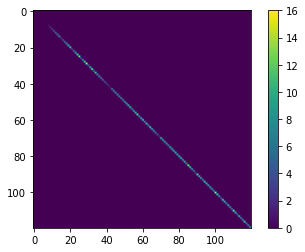

In [181]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(Spar_Hamil_H1)
plt.colorbar()
plt.show()

# $H_2$

In [182]:
# H_2=\omega_R*R_x+\omega_L*L_x


Spar_Hamil_H2=np.zeros((N_Dicke,N_Dicke))

def H_2(State_rep,OmegaR,OmegaL):
    
    n0=State_rep[0]
    n1=State_rep[1]
    n2=State_rep[2]
    n3=N-n2-n1-n0
    
    H2_state=np.zeros((N_Dicke,1))
    
    
    #Rx
    
    if n0!=0 and n3!=N:
        index=States_sorted.index([n0-1,n1,n2,n3+1])
        Vecto_Rep=np.array(Index_States_final[index][2])
        H2_state=H2_state+0.5*OmegaR*sqrt(n0*(n3+1))*Vecto_Rep
    
    if n0!=N and n3!=0:
        index=States_sorted.index([n0+1,n1,n2,n3-1])
        Vecto_Rep=np.array(Index_States_final[index][2])
        H2_state=H2_state+0.5*OmegaR*sqrt(n3*(n0+1))*Vecto_Rep        
    
    # Lx
    
    if n1!=0 and n2!=N:
        index=States_sorted.index([n0,n1-1,n2+1,n3])
        Vecto_Rep=np.array(Index_States_final[index][2])
        H2_state=H2_state+0.5*OmegaL*sqrt(n1*(n2+1))*Vecto_Rep
    
    if n1!=N and n2!=0:
        index=States_sorted.index([n0,n1+1,n2-1,n3])
        Vecto_Rep=np.array(Index_States_final[index][2])
        H2_state=H2_state+0.5*OmegaL*sqrt(n2*(n1+1))*Vecto_Rep     
    
    return H2_state

In [183]:


for i in range(N_Dicke):
    for j in range(N_Dicke):
        Spar_Hamil_H2[i][j]=np.dot(np.transpose(Index_States_final[i][2]),H_2(States_sorted[j],OmegaR,OmegaL))[0][0]

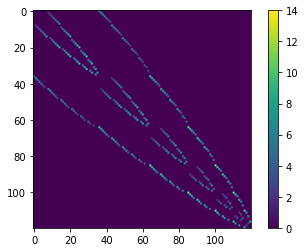

In [184]:

plt.imshow(Spar_Hamil_H2)
plt.colorbar()
plt.show()

## $H=H_1+H_2$

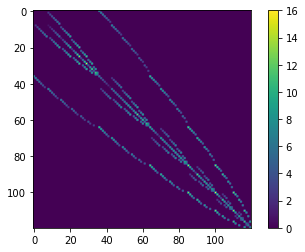

In [185]:

plt.imshow(Spar_Hamil_H1+Spar_Hamil_H2)
plt.colorbar()
plt.show()